In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
def classify(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return model

In [6]:
X = df.iloc[:, :-1] # iloc for selection
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # test size devide 70-30%

In [8]:
lr = LogisticRegression(random_state = 1)

In [9]:
classify(lr)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1763
           1       0.79      0.78      0.78      1586

    accuracy                           0.80      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.80      0.80      0.80      3349



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier()

In [12]:
classify(dt)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1763
           1       0.76      0.77      0.76      1586

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
dt2 = DecisionTreeClassifier(max_depth = 10)

In [14]:
classify(dt2)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1763
           1       0.78      0.80      0.79      1586

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
dt3 =  DecisionTreeClassifier(min_samples_leaf = 10)

In [16]:
dt3 = classify(dt3)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1763
           1       0.79      0.81      0.80      1586

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [17]:
from sklearn import tree

[Text(168.19863138251222, 211.7178947368421, 'X[11] <= 206.5\ngini = 0.499\nsamples = 7813\nvalue = [4110, 3703]'),
 Text(87.23883370195242, 200.2736842105263, 'X[13] <= 9.5\ngini = 0.327\nsamples = 3175\nvalue = [2522, 653]'),
 Text(60.137032870652845, 188.82947368421054, 'X[10] <= 9.5\ngini = 0.242\nsamples = 2459\nvalue = [2112, 347]'),
 Text(32.02903828553997, 177.38526315789474, 'X[10] <= 0.5\ngini = 0.22\nsamples = 2387\nvalue = [2086, 301]'),
 Text(4.902501525320318, 165.94105263157894, 'X[6] <= 0.5\ngini = 0.5\nsamples = 127\nvalue = [64, 63]'),
 Text(3.268334350213545, 154.49684210526317, 'X[9] <= 25.0\ngini = 0.4\nsamples = 76\nvalue = [21, 55]'),
 Text(2.451250762660159, 143.05263157894737, 'X[0] <= 44.5\ngini = 0.305\nsamples = 64\nvalue = [12, 52]'),
 Text(1.6341671751067726, 131.60842105263157, 'X[0] <= 29.5\ngini = 0.162\nsamples = 45\nvalue = [4, 41]'),
 Text(0.8170835875533863, 120.16421052631578, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(2.451250762660159, 1

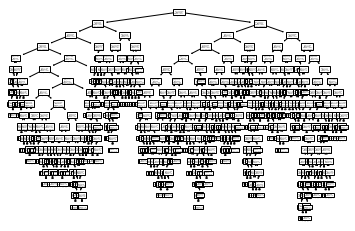

In [18]:
tree.plot_tree(dt3)

In [19]:
dt3.feature_importances_

array([0.05363202, 0.01412321, 0.00478388, 0.00433187, 0.        ,
       0.04325191, 0.05196417, 0.00148018, 0.08672494, 0.04632611,
       0.09355382, 0.43744989, 0.01383606, 0.09166935, 0.000999  ,
       0.05587361])

# Ensembling Technique

# Naive Aggregation

In [20]:
from sklearn.ensemble import VotingClassifier

In [21]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
d2 = DecisionTreeClassifier(criterion = "entropy")

In [22]:
model_list = [("m1", lr),("m2",dt1),("m3",dt2)] # string -model name, model object

In [23]:
vc = VotingClassifier(estimators = model_list) # Hard Voting

In [24]:
classify(vc)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1763
           1       0.79      0.82      0.81      1586

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



VotingClassifier(estimators=[('m1',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('m2',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,...
                                        

In [25]:
vc2 = VotingClassifier(estimators = model_list, voting = "soft")

In [26]:
classify(vc2)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1763
           1       0.78      0.82      0.80      1586

    accuracy                           0.80      3349
   macro avg       0.80      0.81      0.80      3349
weighted avg       0.81      0.80      0.80      3349



VotingClassifier(estimators=[('m1',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('m2',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,...
                                        

# Bagging

In [27]:
from sklearn.ensemble import BaggingClassifier 

In [28]:
bc = BaggingClassifier(lr, n_estimators = 5, max_samples = 100, random_state = 1)

In [29]:
classify(bc)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1763
           1       0.76      0.76      0.76      1586

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=5, n_jobs=None, oob_score=False,
                  random_state=1, verb

# Pasting

In [30]:
bc2 = BaggingClassifier(lr, n_estimators = 5, max_samples = 100, random_state = 1, bootstrap = False)

In [31]:
classify(bc2)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1763
           1       0.77      0.76      0.76      1586

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=5, n_jobs=None, oob_score=False,
                  random_state=1, ver

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators = 10, max_features = 10, random_state = 1)

In [34]:
classify(rf)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1763
           1       0.81      0.83      0.82      1586

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [35]:
!pip install mlxtend

In [36]:
from mlxtend.classifier import StackingClassifier

In [37]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion = 'entropy')

In [38]:
model_list = [lr, dt1, dt2]

In [39]:
meta = LogisticRegression()

In [40]:
sc = StackingClassifier(classifiers = model_list, meta_classifier = meta)

In [41]:
classify(sc)

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1763
           1       0.73      0.88      0.80      1586

    accuracy                           0.79      3349
   macro avg       0.80      0.79      0.79      3349
weighted avg       0.80      0.79      0.79      3349



StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                    

# ADA BOOST

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
ada = AdaBoostClassifier(n_estimators = 100)

In [46]:
classify(ada)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1763
           1       0.81      0.82      0.82      1586

    accuracy                           0.83      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.83      0.83      0.83      3349



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

# Gradient Boost

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
gbc = GradientBoostingClassifier(n_estimators = 100)

In [50]:
classify(gbc)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1763
           1       0.81      0.87      0.84      1586

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.85      0.84      0.84      3349



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# XG Boosting

In [53]:
 !pip install xgboost

In [54]:
from xgboost import XGBClassifier

In [56]:
xc = XGBClassifier(n_estimators = 100, Lambda = 2)

In [58]:
classify(xc)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1763
           1       0.81      0.87      0.84      1586

    accuracy                           0.84      3349
   macro avg       0.84      0.85      0.84      3349
weighted avg       0.85      0.84      0.84      3349



XGBClassifier(Lambda=2, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
xc = XGBClassifier(n_estimators = 100, alpha = 10)

In [60]:
classify(xc)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1763
           1       0.81      0.87      0.84      1586

    accuracy                           0.84      3349
   macro avg       0.84      0.85      0.84      3349
weighted avg       0.85      0.84      0.84      3349



XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)